In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/data.csv", encoding="latin1")

x = df["no2"].dropna().values

/tmp/ipython-input-317168593.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding="latin1")


In [5]:
r = 102303501
a_r = 0.05 * (r % 7)   # = 0.05
b_r = 0.3 * (r % 5 + 1) # = 0.6
z = x + a_r * np.sin(b_r * x)


In [6]:
mu = np.mean(z)
sigma = np.std(z)

lam = 1 / (2 * sigma**2)
c = 1 / np.sqrt(2 * np.pi * sigma**2)

print("Lambda:", lam)
print("Mu:", mu)
print("c:", c)

results = pd.DataFrame({
    "Parameter": ["Lambda (λ)", "Mu (μ)", "c"],
    "Value": [lam, mu, c]
})

print("\nResult Table:")
print(results)


Lambda: 0.0014605747435028832
Mu: 25.8132695310288
c: 0.021561896492825534

Result Table:
    Parameter      Value
0  Lambda (λ)   0.001461
1      Mu (μ)  25.813270
2           c   0.021562


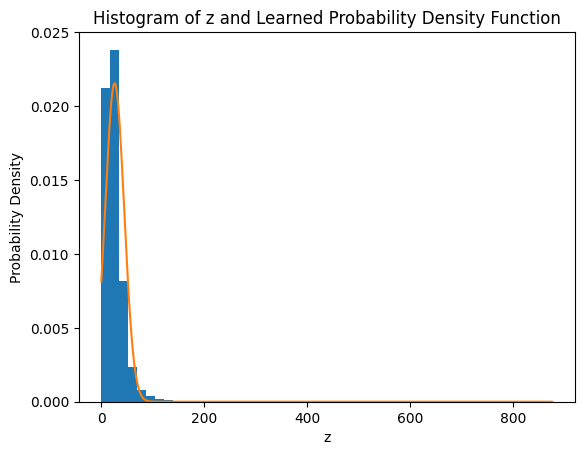

In [7]:
z_sorted = np.sort(z)
pdf = c * np.exp(-lam * (z_sorted - mu)**2)

plt.figure()
plt.hist(z, bins=50, density=True)
plt.plot(z_sorted, pdf)
plt.title("Histogram of z and Learned Probability Density Function")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.show()
